# Visualising 2D data
For this example, we'll use the Meteor data from Nasa, available here: https://www.kaggle.com/nasa/meteorite-landings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
df = pd.read_csv(r'meteorite-landings.csv')
df.head(2)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [5]:
df = df.dropna(subset=['reclong', 'reclat'])
df = df[df.reclong < 300]

## 2D Historgrams
The staple

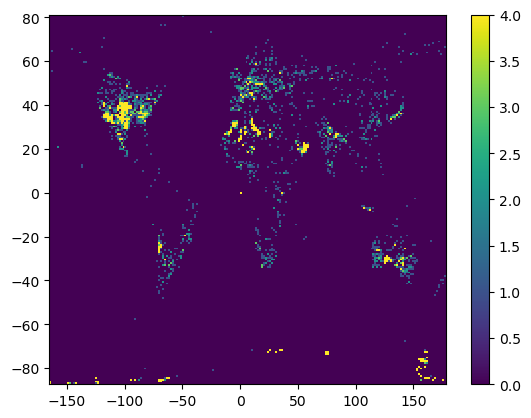

In [7]:
plt.hist2d(df.reclong, df.reclat, bins=200, vmax=4)
plt.colorbar();

## 2D Hex plots

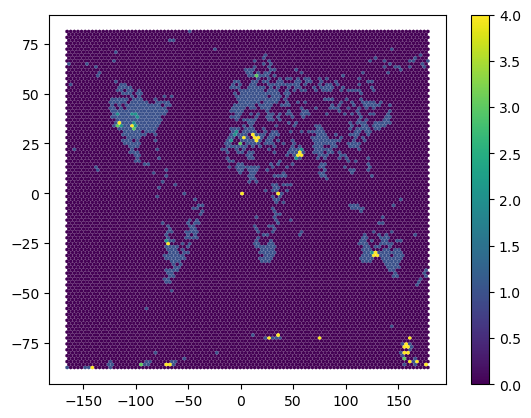

In [11]:
plt.hexbin(df.reclong, df.reclat, bins=200, vmax=4, lw=0.0)
plt.colorbar();

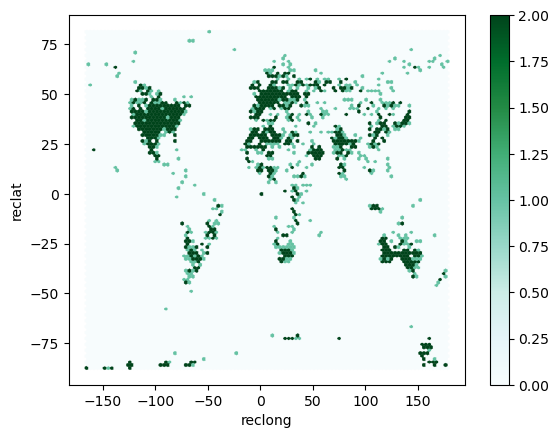

In [12]:
df.plot.hexbin(x='reclong', y='reclat', vmax=2, gridsize=100, linewidth=0.25);


## Contour
It's easiest to show these plots using data with broader shapes, so let's make some.

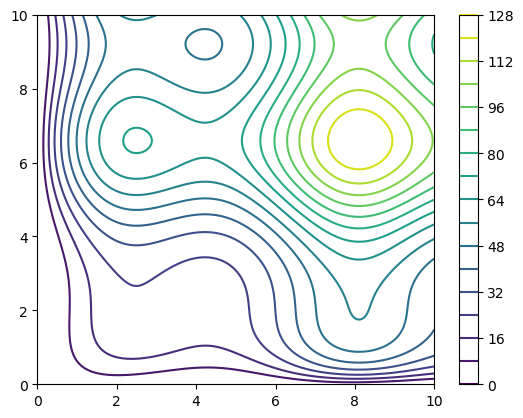

In [13]:
spacing = np.linspace(0, 10, 200)
x, y = np.meshgrid(spacing, spacing)
z = (np.sin(x) + np.cos(y) + 2 * np.arcsinh(x * y)) ** 2

plt.contour(x,y,z, levels=20)
plt.colorbar();

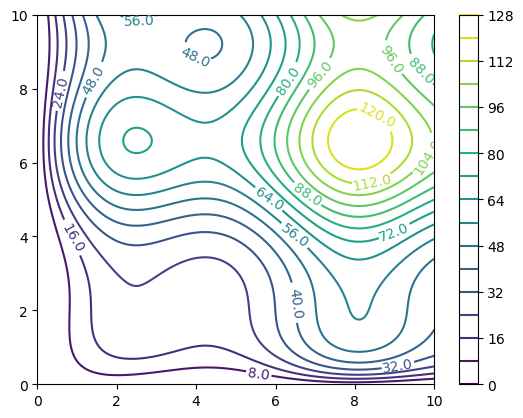

In [15]:
c = plt.contour(x, y, z, levels=20)
plt.clabel(c, inline=True, fmt="%0.1f")
plt.colorbar();

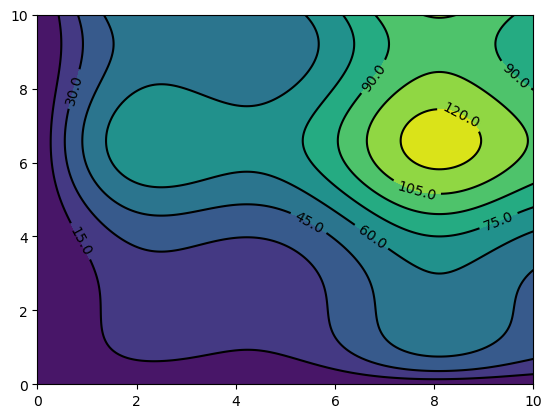

In [16]:
plt.contourf(x,y,z, levels=10)
c = plt.contour(x, y, z, levels=10, colors='black')
plt.clabel(c, inline=True, fmt="%0.1f");

## KDE
To look at KDE, le me quickly draw some samples from the above surface

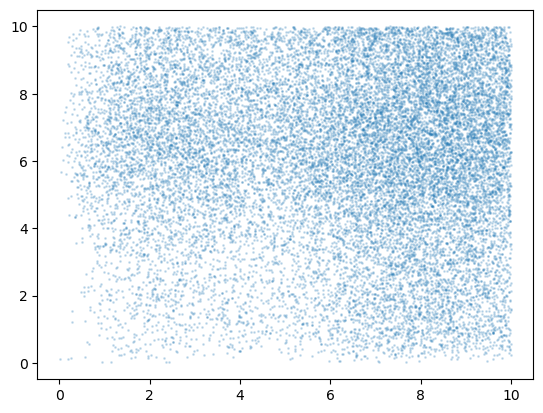

In [18]:
# This is called rejection sampling, a way to brute force sample any surface, so long
# as you're fine waiting for slow code
n = 50000
xs, ys = np.random.uniform(0, 10, n), np.random.uniform(0, 10, n)
zs = (np.sin(xs) + np.cos(ys) + 2 * np.arcsinh(xs * ys)) ** 2
zs /= zs.max()
passed = np.random.uniform(0, 1, n) < zs
xs, ys = xs[passed], ys[passed]
plt.scatter(xs, ys, s=1, alpha=0.2);